# Ejercicios - Práctica 4: Compilación de programas

### Optimización del código gracias al compilador


- Pega el siguiente código en Compiler Explorer (https://godbolt.org/).

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}

```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA: El programa transforma el lenguaje de alto nivel a código máquina


- Añade la opción `-O0` (la letra «o» mayúscula, seguida del número cero) a los parámetros pasados al compilador. Esta opción establece el nivel de optimización del compilador a 0 (desactivado). Una vez que el programa se compile, aparecerá en el centro el código ensamblador generado. Haz una captura de pantalla del código ensamblador generado y pégalo en la siguiente celda

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O0`? 

RESPUESTA: Contiene 13 instrucciones
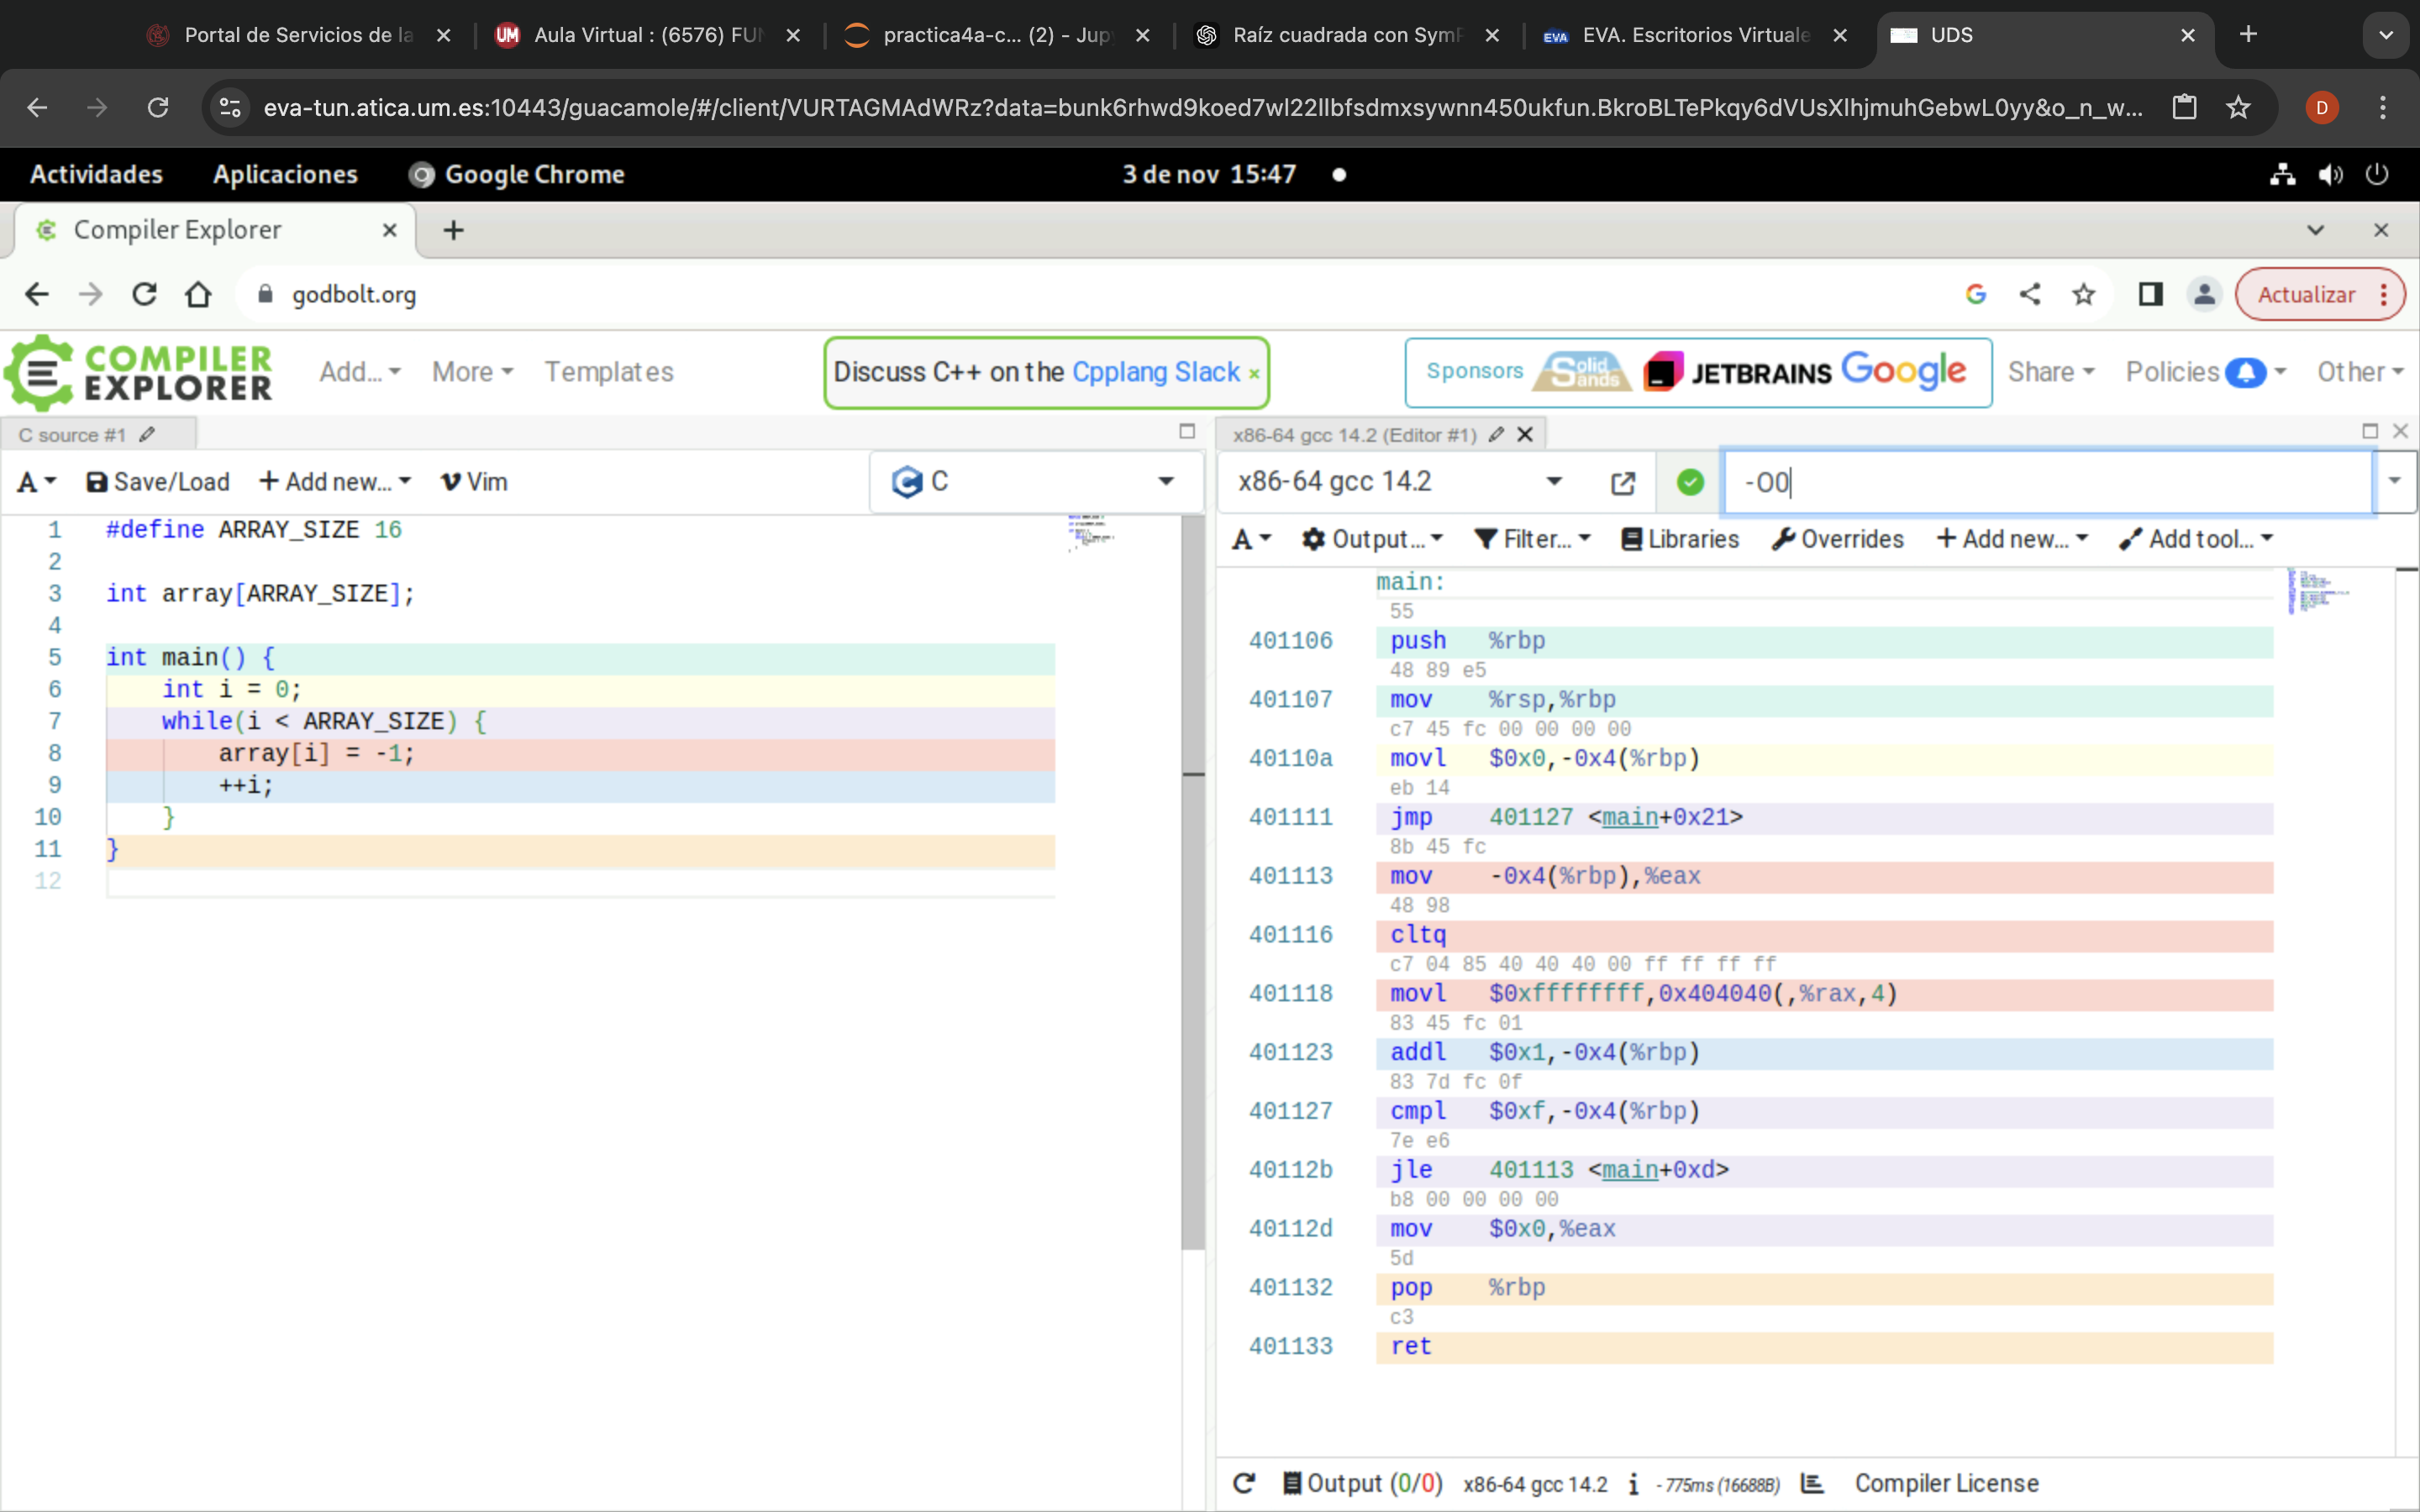

- Ahora, establece el nivel 1 de optimización del compilador, sustituyendo `-O0` por `-O1`. Luego, vuelve a hacer una captura de las instrucciones generadas.

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O1`? 

RESPUESTA: Contiene 9 instrucciones
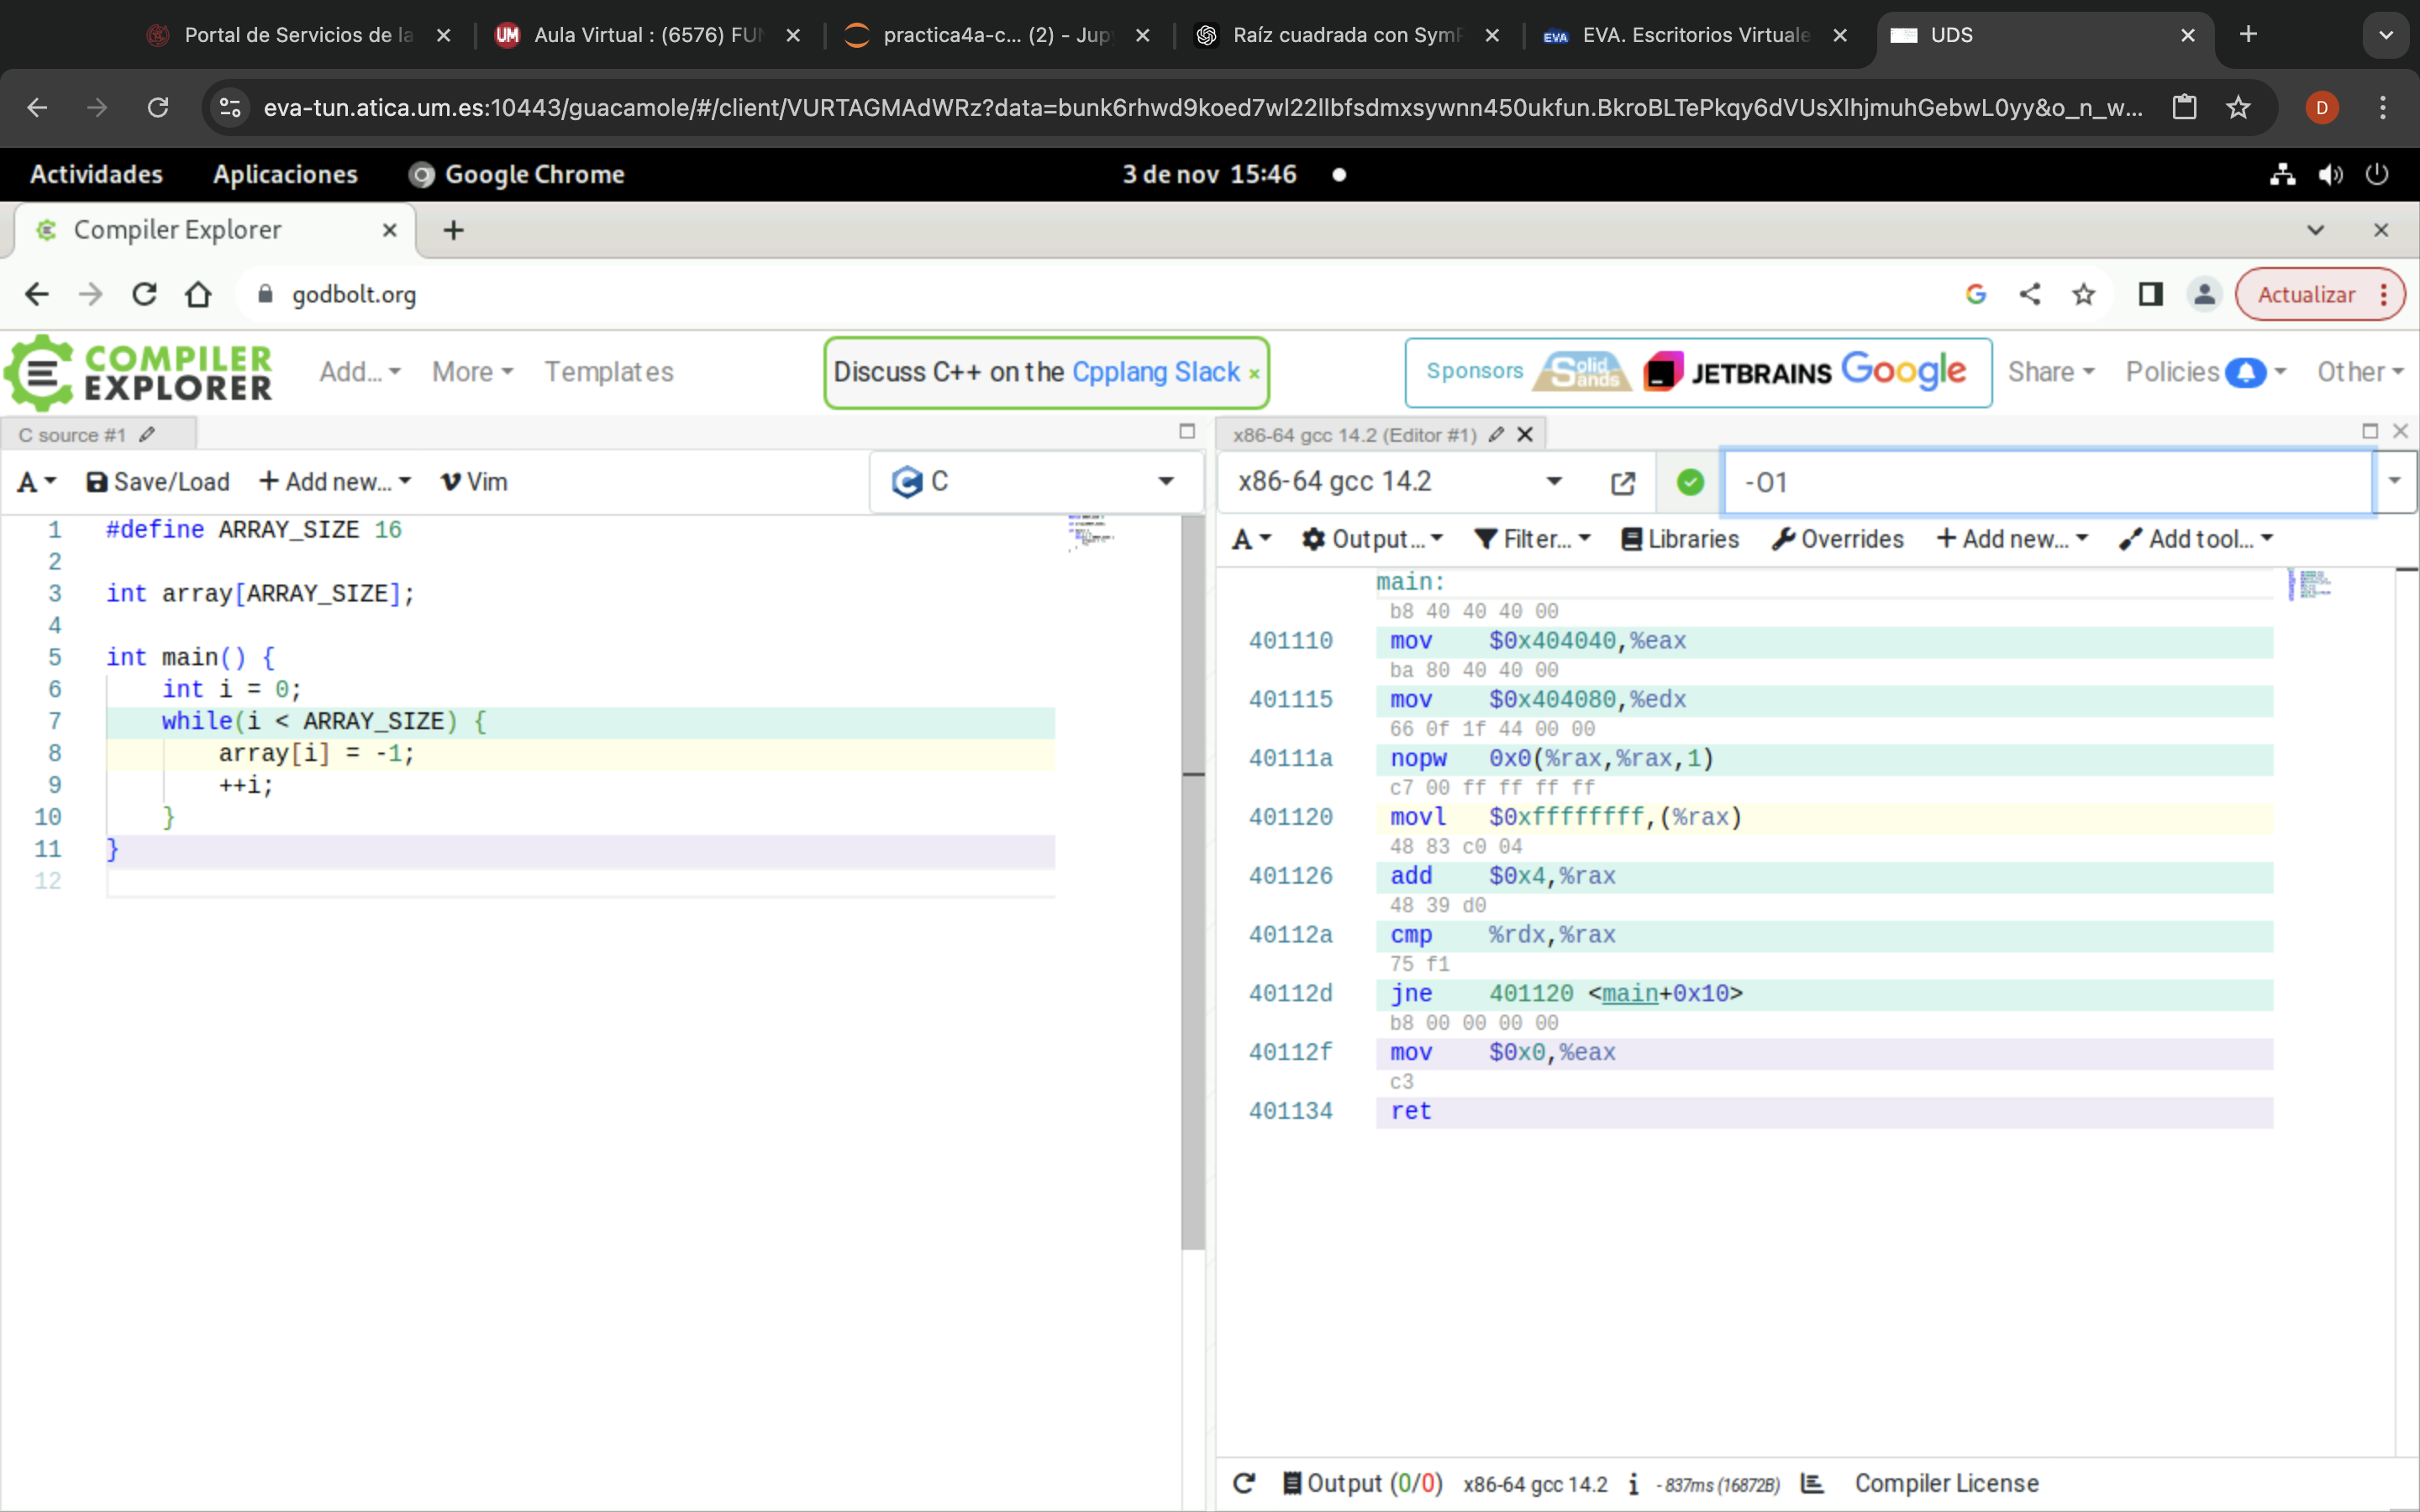

PREGUNTA: A la vista del código fuente en C, y sabiendo que en el ISA x86, la instrucción `jne .L2` realiza un salto a la instrucción marcada con la etiqueta `.L2:`, ¿cuántas veces se ejecutará la instrucción `movl    $-1, (%rax)`?

RESPUESTA: 16 veces


PREGUNTA: A la vista del número de instrucciones que conforman la traducción del bucle *while*, y teniendo en cuenta el número de iteraciones del mismo que se llevan a cabo, ¿cuántas instrucciones, aproximadamente, se ejecutarán para completar el programa? 

RESPUESTA: Se repite 16 veces y el bucle tiene 7 instrucciones, además de las otras dos instrucciones, por lo que se ejecutarán 114

- Por último, establece el nivel 2 de optimización del compilador, sustituyendo `-O1` por `-O2`. Luego, vuelve a hacer una captura de las instrucciones generadas.

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O2`? 

RESPUESTA: 9 instrucciones
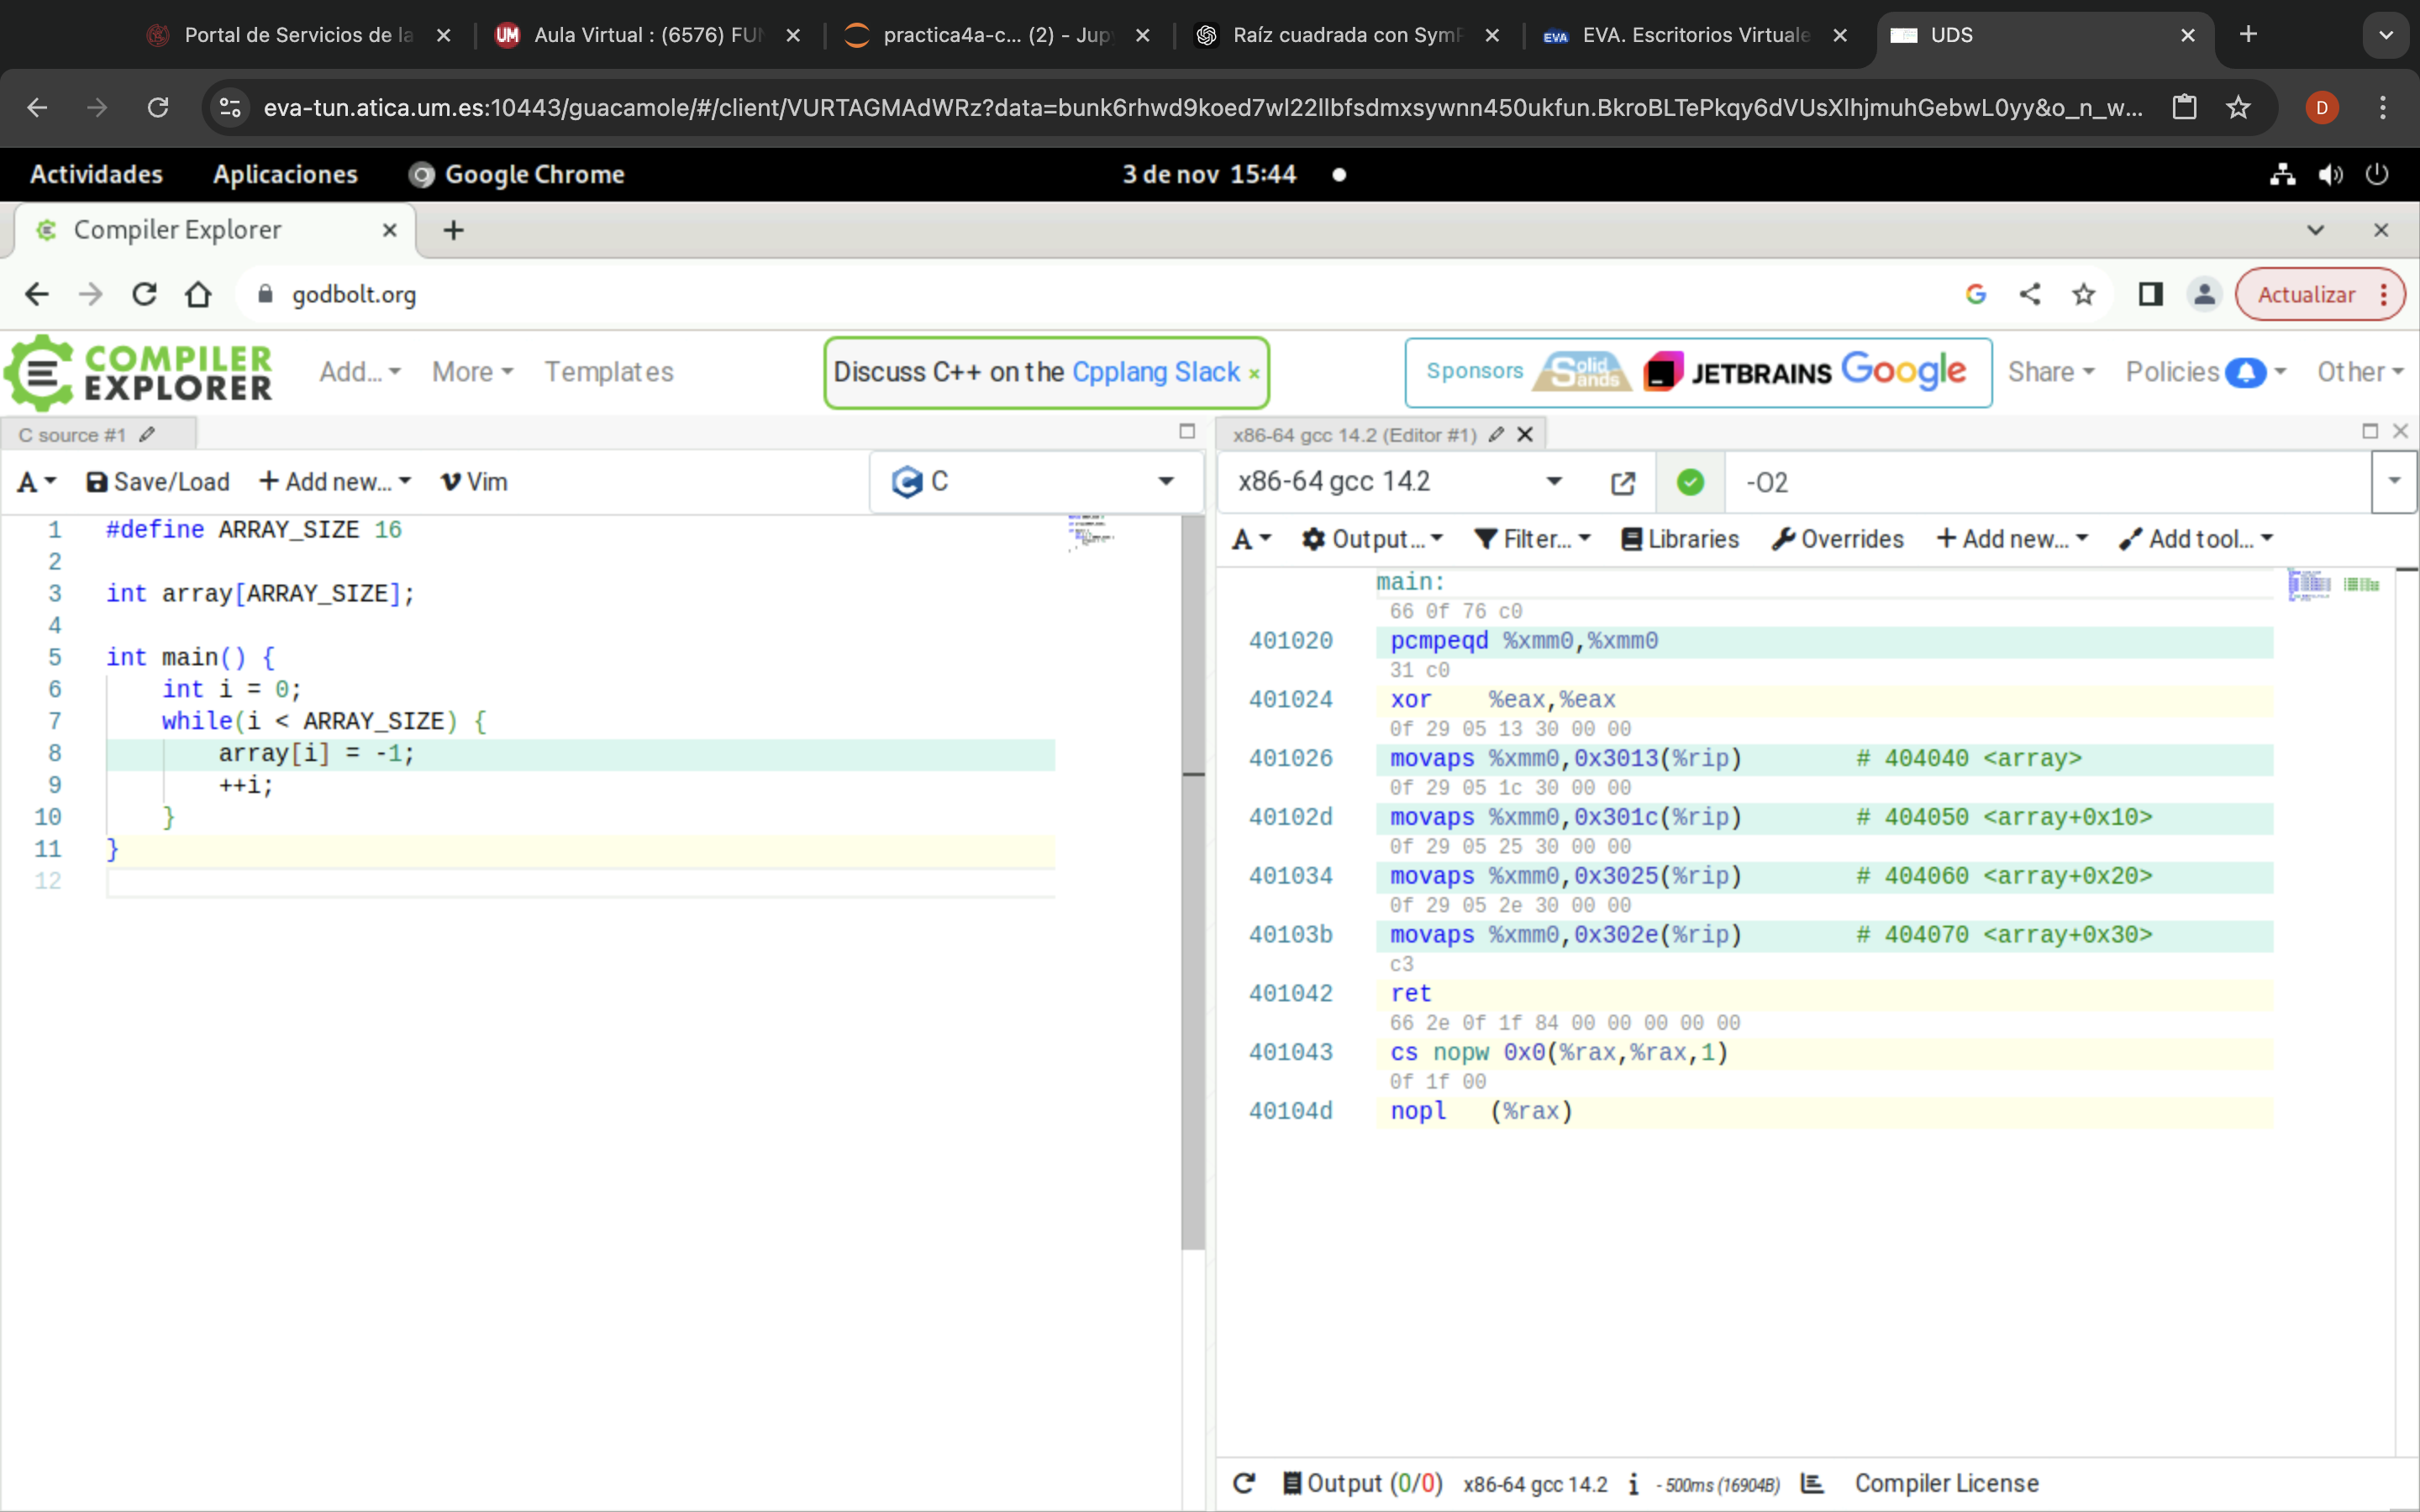

PREGUNTA: A la vista de que no hay ninguna instrucción de salto (`jne`) en el programa generado, ¿cuántas instrucciones, exactamente, se ejecutarán para completar el programa esta vez?


RESPUESTA: 9 instrucciones

**MIDIENDO EL RENDIMIENTO**

Ejecuta la siguiente celda para generar el fichero `array_write.c` con el código fuente del programa anterior. Fíjate que la única diferencia con el programa que hemos compilado mediante la aplicación web de *Compiler explorer* es que ahora el array es de tamaño mucho mayor (2^22, algo más de 4 millones de elementos). Trabajar con un array más grande conlleva más instrucciones ejecutadas y nos permite medir el tiempo total que tarda el programa en ejecutarse de manera más precisa y menos sensible a perturbaciones por factores externos al programa.

In [1]:
#IV.11
#IV.8
#IV.7
#IV.5
#IV.4
#IV.2
#IV.1
# Ejecuta esta celda para generar el fichero array_write.c
cat <<EOF > array_write.c
#define ARRAY_SIZE (1 << 22)

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
EOF

Ahora, compila el programa en C anterior directamente a un ejecutable, usando el nivel de optimización 0. El programa ejecutable se debe llamar `array_write_O0`. 

In [2]:
gcc -O0 array_write.c -o array_write_O0

Repite lo anterior, pero usando el nivel de optimización 2 y llamando  `array_write_O2` al ejecutable generado. 

In [3]:
gcc -O2 array_write.c -o array_write_O2

Por último, ejecuta las siguientes celdas, para medir el tiempo empleado en ejecutar cada programa:

In [4]:
time ./array_write_O0


real	0m0,047s
user	0m0,009s
sys	0m0,039s


In [5]:
time ./array_write_O2


real	0m0,015s
user	0m0,000s
sys	0m0,015s


PREGUNTA: A la vista del rendimiento (tiempo de ejecución) de cada programa y de lo visto en los ejercicios anteriores, ¿qué conclusiones sacas?

RESPUESTA: 


### Ensamblado y desensamblado

Vamos a compilar el programa array_write.c para generar código ensamblador: `array_write.s`. La opción que ves produce una salida más *limpia* y fácilmente legible.

In [16]:
gcc -S -O1 array_write.c -fno-asynchronous-unwind-tables

In [17]:
ls -l array_write.s

-rw-r--r-- 1 jupyter-ztDGIqnuZ9 jupyter-ztDGIqnuZ9 603 nov  3 16:55 array_write.s


Con el comando `nl`, podemos numerar las líneas de un fichero de texto.

In [18]:
nl array_write.c

     1	#define ARRAY_SIZE (1 << 22)
       
     2	int array[ARRAY_SIZE];
       
     3	int main() {
     4	    int i = 0;
     5	    while(i < ARRAY_SIZE) {
     6	        array[i] = -1;
     7	        ++i;
     8	    }
     9	}


PREGUNTA: ¿Cuántas líneas tiene el fichero de código ensamblador generado? ¿Entre qué dos números de línea está el bucle del programa?

RESPUESTA: Tiene 9 líneas, está en bucle en las líneas 6 y 7



Ensambla el fichero `array_write.s` para generar un fichero objeto `array_write.o`.

In [21]:
gcc array_write.s -o array_write.o

In [22]:
ls -l array_write.o

-rwxr-xr-x 1 jupyter-ztDGIqnuZ9 jupyter-ztDGIqnuZ9 15816 nov  3 16:56 array_write.o


Desensambla el fichero `array_write.o`:

In [23]:
#IV.3
objdump -d array_write.o


array_write.o:     formato del fichero elf64-x86-64


Desensamblado de la sección .init:

0000000000001000 <_init>:
    1000:	f3 0f 1e fa          	endbr64 
    1004:	48 83 ec 08          	sub    $0x8,%rsp
    1008:	48 8b 05 d9 2f 00 00 	mov    0x2fd9(%rip),%rax        # 3fe8 <__gmon_start__@Base>
    100f:	48 85 c0             	test   %rax,%rax
    1012:	74 02                	je     1016 <_init+0x16>
    1014:	ff d0                	call   *%rax
    1016:	48 83 c4 08          	add    $0x8,%rsp
    101a:	c3                   	ret    

Desensamblado de la sección .plt:

0000000000001020 <.plt>:
    1020:	ff 35 a2 2f 00 00    	push   0x2fa2(%rip)        # 3fc8 <_GLOBAL_OFFSET_TABLE_+0x8>
    1026:	f2 ff 25 a3 2f 00 00 	bnd jmp *0x2fa3(%rip)        # 3fd0 <_GLOBAL_OFFSET_TABLE_+0x10>
    102d:	0f 1f 00             	nopl   (%rax)

Desensamblado de la sección .plt.got:

0000000000001030 <__cxa_finalize@plt>:
    1030:	f3 0f 1e fa          	endbr64 
    1034:	f2 ff 25 bd 2f 00 00 	bnd jmp *0

PREGUNTA: ¿Cuál es el tamaño en bytes del código máquina generado? ¿Cuál es el código máquina de la instrucción `ret`, expresado en binario?

RESPUESTA: 


### Compilar un programa compuesto por múltiples módulos

In [24]:
# Ejecuta esta celda para generar el fichero arrays_iguales.c
cat <<EOF > arrays_iguales.c
#include <stdbool.h>

int arrays_iguales(int size, int array1[], int array2[]) {
    int i = 0;
    while(i < size) {
        if (array1[i] != array2[i]) {
            return false;
        };
        ++i;
    }
    return true;
}
EOF

In [25]:
# Ejecuta esta celda para generar el fichero miprograma.c
cat <<EOF > miprograma.c
#include <stdbool.h>
#define ARRAY_SIZE 8

int a[ARRAY_SIZE] = {0,1,2,3,4,5,6,7};
int b[ARRAY_SIZE] = {0,1,2,3,4,5,6,8};

//Declaramos la función de "array_iguales.c" para poder llamarla desde main
int arrays_iguales(int size, int array1[], int array2[]); 

int main() {
    return arrays_iguales(ARRAY_SIZE, a, b);
}
EOF

PREGUNTA: ¿Qué hace este programa?

RESPUESTA:

@Comparar dos arrays de 8 enteros cada uno, haciendo uso de una función llamada "arrays_iguales", que está definida en otro fichero de código fuente.@

PREGUNTA: ¿Qué variables utiliza `miprograma.c`?

RESPUESTA: Utiliza la constante ARRAY_SIZE, a, b parámetros de la función arrays_iguales


Compila el fichero `miprograma.c` para generar un fichero objeto llamado `miprograma.o`.

In [30]:
gcc -c miprograma.c miprograma.o

gcc: warning: miprograma.o: linker input file unused because linking not done


Compila el fichero `arrays_iguales.c` para generar un fichero objeto llamado `arrays_iguales.o`.

In [31]:
gcc -c arrays_iguales.c arrays_iguales.o

gcc: warning: arrays_iguales.o: linker input file unused because linking not done


Con el comando `nm` podemos ver los símbolos (nombres de variables, funciones, etc.) que contiene un determinado fichero de código objeto. Ejemplo: `nm fichero.o`. Muestra los símbolos del fichero `miprograma.o`. Después, busca en la ayuda de `nm` la opción para mostrar únicamente los símbolos no definidos en este módulo (pero que aparecen referenciados en el módulo). A la vista de la información recabada, responde a la siguiente pregunta:

In [32]:
#IV.6
nm miprograma.o

0000000000000000 D a
                 U arrays_iguales
0000000000000020 D b
0000000000000000 T main


In [33]:
nm

000000000000038c r __abi_tag
0000000000004040 B array
0000000000004010 B __bss_start
0000000000004020 b completed.0
                 w __cxa_finalize@GLIBC_2.2.5
0000000000004000 D __data_start
0000000000004000 W data_start
0000000000001070 t deregister_tm_clones
00000000000010e0 t __do_global_dtors_aux
0000000000003df8 d __do_global_dtors_aux_fini_array_entry
0000000000004008 D __dso_handle
0000000000003e00 d _DYNAMIC
0000000000004010 D _edata
0000000001004040 B _end
0000000000001150 T _fini
0000000000001120 t frame_dummy
0000000000003df0 d __frame_dummy_init_array_entry
0000000000002094 r __FRAME_END__
0000000000003fc0 d _GLOBAL_OFFSET_TABLE_
                 w __gmon_start__
0000000000002004 r __GNU_EH_FRAME_HDR
0000000000001000 T _init
0000000000002000 R _IO_stdin_used
                 w _ITM_deregisterTMCloneTable
                 w _ITM_registerTMCloneTable
                 U __libc_start_main@GLIBC_2.34
0000000000001129 T main
00000000000010a0 t register_tm_clones
00000000000010

PREGUNTA: ¿Cuántos símbolos contiene el fichero objeto `miprograma.o`? ¿Cuáles están definidos en el propio módulo de código objeto y cuáles no están definidos?

RESPUESTA: 


PREGUNTA: Trata de compilar el fichero `miprograma.c` para generar directamente un ejecutable llamado `compara_arrays`. ¿Qué ocurre? Razona la respuesta.

In [35]:
gcc -c miprograma.c compara_arrays

gcc: warning: compara_arrays: linker input file unused because linking not done
gcc: error: compara_arrays: linker input file not found: No existe el archivo o el directorio


: 1

RESPUESTA:



 Ahora usa `nm` para mostrar los símbolos del fichero objeto `arrays_iguales.o`

In [36]:
#IV.9
# Muestra todos los símbolos
nm arrays_iguales.o

0000000000000000 T arrays_iguales


In [37]:
#IV.10
# Símbolos no definidos´
nm

000000000000038c r __abi_tag
0000000000004040 B array
0000000000004010 B __bss_start
0000000000004020 b completed.0
                 w __cxa_finalize@GLIBC_2.2.5
0000000000004000 D __data_start
0000000000004000 W data_start
0000000000001070 t deregister_tm_clones
00000000000010e0 t __do_global_dtors_aux
0000000000003df8 d __do_global_dtors_aux_fini_array_entry
0000000000004008 D __dso_handle
0000000000003e00 d _DYNAMIC
0000000000004010 D _edata
0000000001004040 B _end
0000000000001150 T _fini
0000000000001120 t frame_dummy
0000000000003df0 d __frame_dummy_init_array_entry
0000000000002094 r __FRAME_END__
0000000000003fc0 d _GLOBAL_OFFSET_TABLE_
                 w __gmon_start__
0000000000002004 r __GNU_EH_FRAME_HDR
0000000000001000 T _init
0000000000002000 R _IO_stdin_used
                 w _ITM_deregisterTMCloneTable
                 w _ITM_registerTMCloneTable
                 U __libc_start_main@GLIBC_2.34
0000000000001129 T main
00000000000010a0 t register_tm_clones
00000000000010

Finalmente, escribe el comando necesario para conseguir generar un programa ejecutable llamado `compara_arrays`:

Ejecuta el programa para comprobar que devuelve un 0 (*false*), ya que los arrays `a` y `b` tienen valores distintos.

In [ ]:
./compara_arrays; echo $?    # echo $? muestra el valor retornado por el último comando

In [ ]:
# Cleanup
FILES="
arrays_iguales.c
arrays_iguales.o
array_write.c
array_write.o
array_write_O0
array_write_O2
array_write.s
compara_arrays
miprograma.c
miprograma.o"
rm -f $FILES

# Ejercicios - Práctica 4: Ensamblador RISC-V. Ejecución con RIPES

### Escribir datos en memoria: `result = var1 - var2`

- El programa que se muestra a continuación debe restar dos variables en memoria `var1` y `var2`, y luego escribir el resultado en una tercera variable llamada `result`. Sin embargo, el programa está incompleto.

```
    .data
var1: .word 0xa0b0c0
var2: .word 0x0c
result: .word 0xffffffff

    .text

    la x4, var1			
    lw x5, 0(x4)    # (1)
    lw x6, 4(x4)    # (2)
    sub x7,x5,x6    # (3)
                    # (4) 
```

- Copia y pega el código anterior Ripes, y ejecuta hasta llegar a la instrucción marcada con (2).

PREGUNTA: A la vista de los valores de los registros, en este punto del programa ¿en qué dirección de memoria está ubicada la variable `var1`? ¿Cuál es el tamaño de dicha variable? Indica qué direcciones de memoria ocupa (inicial y final, inclusive)

RESPUESTA: ocupa desde 0x100000000 hasta 0x100000003, 4 bytes.


PREGUNTA: ¿Qué instrucción habría que añadir en la línea marcada con (4) para que el programa escriba el resultado de la resta en la variable `result`?.

RESPUESTA: la x4 result sw x7. 0(x4)

PREGUNTA: Haz una captura de pantalla que muestre el valor de los registros x4,x5 y x6 antes de ejecutar la instrucción (2). ¿De dónde procede el valor que tiene el registro x5? 

RESPUESTA:


PREGUNTA: ¿Cuál es la codificación en lenguaje máquina de la instrucción `lw x5, 0(x4)`? ¿Entre qué dos dirección de memoria se ubica dicha instrucción? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de texto (parte de la memoria donde se ubican las instrucciones del programa).

RESPUESTA: la codificación es 00022283.


PREGUNTA: ¿Cuál es el valor del byte en la dirección de memoria 0x10000002? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de datos (parte de la memoria donde se ubican las variables globales del programa).

RESPUESTA: b0


PREGUNTA: A la vista del valor inicial de la variable `var1` (en el código ensamblador) y el valor de los bytes en que se almacena en memoria, ¿qué esquema de almacenamiento (endianness u orden de bytes) se utiliza en RISC-V? 

RESPUESTA: little endian


PREGUNTA: ¿Cuál es el valor inicial, en decimal, de la variable `result` (en el código ensamblador)? ¿En qué direcciones de memoria se almacena? ¿Cuál es el valor hexadecimal de cada uno  de los 4 bytes en que se almacena en memoria?

RESPUESTA: 


PREGUNTA: Continúa ejecutando el programa hasta el final. ¿Cuál es el valor final de la variable `result` en memoria? ¿De dónde procede el valor almacenado en dichas posiciones de memoria? Pega una captura de pantalla de la pestaña "Memory" que lo muestre. 

RESPUESTA: procede de restar el valor de x5 menos el de x6


### Ubicación de los datos del programa en memoria

- Entra en la configuración de Ripes (*Settings*) y asegúrate de establecer los argumentos del compilador y enlazador como se muestra en la siguiente imagen. Debes pasar **-O1** al compilador para que optimice el código y **-nostdlib** al enlazador para evitar enlazar con la biblioteca estándar. 

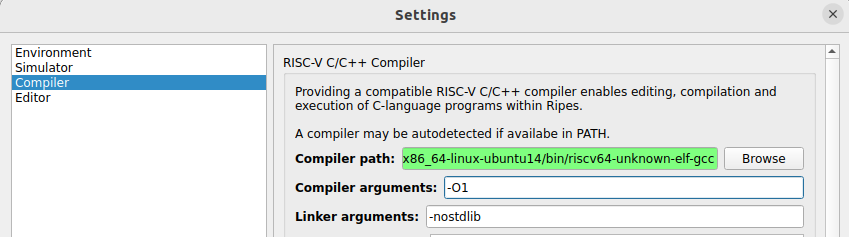

- A continuación, copia el siguiente código en el editor y compila a ensamblador.

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA: El programa inicializa un array de 16 enteros con valores de 15 a 0. Luego, utiliza un bucle while para recorrer el array y reemplaza cada elemento con -1. Al finalizar, todos los elementos del array son -1.

- Haz una captura de pantalla de la memoria ocupada por el array. Para ello, debes ir a la vista *Memory* y luego seleccionar *Go to section->.data*.

PREGUNTA: ¿Cuántos bytes ocupa el array en memoria? ¿Entre qué dos direcciones de memoria se encuentra almacenado el array? 

RESPUESTA: ocupa 64 bytes

PREGUNTA: ¿Entre qué dos direcciones de memoria se almacena el primer elemento del array? Indica los valores en hexadecimal de cada byte que ocupa.

RESPUESTA: se almacena entre las direcciones de memoria 0x1000 y 0x1003

PREGUNTA: A la vista del valor inicial del primer elemento en el código C, ¿qué orden de bytes usa RISC-V?

RESPUESTA: Dado que el valor inicial del primer elemento es 15 y ocupa la dirección más baja como 0F, RISC-V usa orden de bytes little-endian.


PREGUNTA: Ejecuta paso a paso el programa hasta completar la primera iteración del bucle. ¿Qué registro se utiliza para guardar el valor entero -1? ¿Cuál es la codificación del -1 como entero con signo de 4 bytes?

RESPUESTA: El valor -1 se almacena en el registro t1. -1 se representa en complemento a dos como 0xFFFFFFFF en 4 bytes.

PREGUNTA: ¿Qué instrucción es la que escribe en el array el valor -1?  ¿En qué dirección de memoria está ubicada dicha instrucción?

RESPUESTA: La instrucción en ensamblador RISC-V que escribe -1 es sw. 

PREGUNTA: Continúa ejecutando iteraciones del bucle. ¿Qué valores va tomando el registro x15? ¿Para qué se utiliza dicho registro?

RESPUESTA: En cada iteración del bucle, x15 toma los valores correspondientes al índice i del bucle. Toma sucesivamente los valores 0, 1, 2, 3, ... hasta 15. x15 se utiliza como contador de bucle, almacenando el índice i para acceder a cada posición del array dentro del bucle.

### Un error de programación habitual

- Copia y pega el siguiente programa en C en el editor. Luego, elimina la opción **-O1** de los argumentos del compilador. Finalmente, ejecuta el programa paso a paso durante algunas iteraciones del bucle, y luego cambia a la pestaña *Memory* para observar la sección *.data* mientras observas los valores del array. 

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
    }
}
```

PREGUNTA: ¿Qué le ocurre al programa? Sabiendo que el programador quería establecer a -1 todos los elementos del array, ¿dónde está el error?

RESPUESTA: El programa entra en un bucle infinito porque i nunca se incrementa. El error está en la falta de i++ dentro del bucle while. Sin este incremento, solo se modifica array[0] repetidamente.

- El siguiente programa en ensamblador es similar al programa en C anterior (escribe el valor -1 en todos los elementos de un array). Copia y pega en Ripes, y simula paso a paso observando lo que le ocurre al programa.

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
        
    .text
main:
        la      a5, array
        addi    a3,a5,16
        li      a4, 0
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        bne     a5,a3,loop
        li      a0,0
        ret

```

PREGUNTA: ¿Qué le ocurre al programa? ¿Podrías identificar el *bug* y resolverlo?

RESPUESTA: El programa entra en un bucle infinito porque a5 (la dirección del array) no se actualiza. Falta incrementar a5 después de cada escritura en el array.

### Otro tipo de *bugs* bastante común

- Esta es otra versión diferente del programa que contiene un error distinto. Copia y pega el siguiente código en Ripes, y ejecuta tanto desde el editor como desde la pestaña *Memory*, observando lo que ocurre con los valores del array y de la variable "hola".

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
hola:   .string "En un lugar de la Mancha, de cuyo nombre no quiero acordarme,..."
        
    .text
main:
        la      a5, array
        addi    a3,a5,-16
        li      a4, -1
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        addi    a5,a5,4
        bne     a5,a3,loop
        li      a0,0
        ret
```

PREGUNTA: ¿Qué le ocurre a este programa? ¿Cómo podrías solucionarlo? *PISTA: Fíjate en cómo se usa el registro a3 en el programa del ejercicio anterior.*)

RESPUESTA: El programa intenta escribir en el array pero a3 se calcula incorrectamente como a5 - 16, lo que provoca que a5 nunca alcance la dirección de finalización, llevando a un bucle infinito. Cambia addi a3, a5, -16 a addi a3, a5, 16 para que a3 apunte correctamente a la dirección final del array.